In [47]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [48]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [51]:
image = cv2.imread('./AKK_ASTA_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


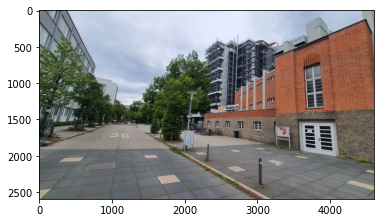

In [52]:
plt.imshow(image)

In [55]:
bboxes = [0.744141, 0.429591, 0.511719, 0.774306]
category_ids = [1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {1: 'AKK'}

In [56]:
visualize(image, bboxes, category_ids, category_id_to_name)


TypeError: cannot unpack non-iterable float object

## Import Bounding Box from txt File

In [39]:
import os
from os import walk, getcwd
import numpy as np
import cv2

In [40]:
""" Configure Paths"""   
mypath = "C:/Users/bench/PycharmProjects/AISS_CV/Training Dataset/"
outpath = "./result/"
wd = getcwd()

In [41]:
txt_list = []
for file in os.listdir(mypath):
    if file.endswith(".txt"):
        txt_list.append(file)
        

In [44]:

for txt_name in txt_list:
    img_filename = txt_name.rstrip(".txt") + ".jpg"
    img_path = mypath + txt_name.rstrip(".txt") + ".jpg"
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt_path = mypath + txt_name
    print("Input:" + txt_path)
    txt_file = open(txt_path, "r")
    lines = txt_file.read().splitlines()  
    for idx, line in enumerate(lines):
        value = line.split()
        x=y=w=h=cls= None
        cls = value[0]
        x = float(value[1])
        y = float(value[2])
        w = float(value[3])
        h = float(value[4])
        bboxes = [x,y,w,h]
        print(bboxes)
        category_ids = [cls]
        print(cls)
        
        category_id_to_name = {   0: 'Mensa', 1: 'AKK', 2: 'Audimax', 3: 'Neue Bib' , 4: 'Alte Bib', 5: 'Studierendenwerk', 6: 'Lernzentrum',  7: 'Mathebau', 8:'Harber-Bosch-Reaktor'
, 9: 'Statue am Ehrenhof' , 10: 'Heinrich-Hertz-Denkmal' , 11:'Kolben' , 12:'Wärmeflasche' , 13:'Gründerschmiede'}
        print(category_id_to_name.get(int(cls)))
        
        visualize(img, bboxes, cls)

C:/Users/bench/PycharmProjects/AISS_CV/Training Dataset/AKK_ASTA_1.jpg
Input:C:/Users/bench/PycharmProjects/AISS_CV/Training Dataset/AKK_ASTA_1.txt
[0.744141, 0.429591, 0.511719, 0.774306]
1
AKK


TypeError: cannot unpack non-iterable float object